In [ ]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2021-12-13 06:59:27--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-12-13 06:59:28 (78.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
unzip_data('/content/drive/MyDrive/Untitled folder/car-damage-dataset.zip')

In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (192, 263, 3)


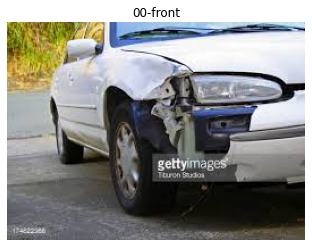

In [ ]:
# View a random image 
img = view_random_image(target_dir="/content/car-damage-dataset/data2a/training/",
                        target_class="00-front")

In [ ]:
train="/content/car-damage-dataset/data2a/training/"
test="/content/car-damage-dataset/data2a/validation/"

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="categorical", # type of problem we're working on
                                               seed=42, shuffle=True )

valid_data = test_datagen.flow_from_directory(test,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

Found 979 images belonging to 3 classes.
Found 171 images belonging to 3 classes.


In [ ]:
# importing the libraries
from keras.models import Model
from keras.layers import Flatten, Dense
from tensorflow.keras.applications import VGG16
#from keras.preprocessing import image 

# loading the weights of VGG16 without the top layer. These weights are trained on Imagenet dataset.
vgg = VGG16(input_shape = [224, 224, 3], weights = 'imagenet', include_top = False)  

# this will exclude the initial layers from training phase as there are already been trained.
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
x = Dense(128, activation = 'relu')(x)   # we can add a new fully connected layer but it will increase the execution time.
x = Dense(3, activation = 'softmax')(x)  # adding the output layer with softmax function as this is a multi label classification problem.

model_3 = Model(inputs = vgg.input, outputs = x)

model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model 
history_3 = model_3.fit(train_data, epochs=10, steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/10
31/31 [==============================] - 10s 290ms/step - loss: 1.5090 - accuracy: 0.4811 - val_loss: 0.9006 - val_accuracy: 0.6374
Epoch 2/10
31/31 [==============================] - 9s 279ms/step - loss: 0.5914 - accuracy: 0.7722 - val_loss: 0.7787 - val_accuracy: 0.6608
Epoch 3/10
31/31 [==============================] - 9s 278ms/step - loss: 0.4002 - accuracy: 0.8764 - val_loss: 0.7655 - val_accuracy: 0.6842
Epoch 4/10
31/31 [==============================] - 9s 278ms/step - loss: 0.2760 - accuracy: 0.9418 - val_loss: 0.7606 - val_accuracy: 0.7193
Epoch 5/10
31/31 [==============================] - 9s 279ms/step - loss: 0.1748 - accuracy: 0.9745 - val_loss: 0.8175 - val_accuracy: 0.6725
Epoch 6/10
31/31 [==============================] - 9s 279ms/step - loss: 0.1119 - accuracy: 0.9888 - val_loss: 0.7644 - val_accuracy: 0.7251
Epoch 7/10
31/31 [==============================] - 9s 280ms/step - loss: 0.0725 - accuracy: 0.9928 - val_loss: 0.7622 - val_accuracy: 0.7135
Epoch

In [ ]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:15]:
  layer.trainable = False

# Recompile the model (always recompile after any adjustments to a model)
model_3.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=["accuracy"])
# Fit the model 
history_3 = model_3.fit(train_data, epochs=10, steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/10
31/31 [==============================] - 10s 292ms/step - loss: 0.0298 - accuracy: 0.9949 - val_loss: 0.8098 - val_accuracy: 0.7310
Epoch 2/10
31/31 [==============================] - 9s 280ms/step - loss: 0.0282 - accuracy: 0.9939 - val_loss: 0.8559 - val_accuracy: 0.7135
Epoch 3/10
31/31 [==============================] - 9s 280ms/step - loss: 0.0265 - accuracy: 0.9949 - val_loss: 0.8500 - val_accuracy: 0.7251
Epoch 4/10
31/31 [==============================] - 9s 280ms/step - loss: 0.0221 - accuracy: 0.9949 - val_loss: 0.8307 - val_accuracy: 0.7310
Epoch 5/10
31/31 [==============================] - 9s 279ms/step - loss: 0.0209 - accuracy: 0.9949 - val_loss: 0.8409 - val_accuracy: 0.7368
Epoch 6/10
31/31 [==============================] - 9s 280ms/step - loss: 0.0207 - accuracy: 0.9949 - val_loss: 0.8600 - val_accuracy: 0.7368
Epoch 7/10
31/31 [==============================] - 9s 281ms/step - loss: 0.0197 - accuracy: 0.9939 - val_loss: 0.8506 - val_accuracy: 0.7427
Epoch

In [ ]:
model_3.save('car damage location model.h5')

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
def pred_and_plot(model, filename):
  
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)
  
  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred=pred.argmax()

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred}")
  plt.axis(False);


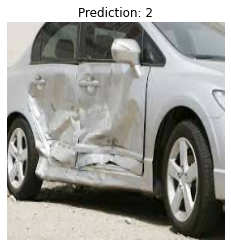

In [ ]:
# Test our model 
pred_and_plot(model_3, "test7.jpg")